# Task 

---

## Web scraping and analysis

This Jupyter notebook includes the code for web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. 

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

FOR EXPLANATION ON THE VISUALISATIONS IN THIS CODE CHECK THE FOLLOWING LINK: https://github.com/mazecracks/code/tree/main/BRITISH%20AIRWAYS

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Webscraping process

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 382
page_size = 10

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 10 total reviews
Scraping page 2
   ---> 20 total reviews
Scraping page 3
   ---> 30 total reviews
Scraping page 4
   ---> 40 total reviews
Scraping page 5
   ---> 50 total reviews
Scraping page 6
   ---> 60 total reviews
Scraping page 7
   ---> 70 total reviews
Scraping page 8
   ---> 80 total reviews
Scraping page 9
   ---> 90 total reviews
Scraping page 10
   ---> 100 total reviews
Scraping page 11
   ---> 110 total reviews
Scraping page 12
   ---> 120 total reviews
Scraping page 13
   ---> 130 total reviews
Scraping page 14
   ---> 140 total reviews
Scraping page 15
   ---> 150 total reviews
Scraping page 16
   ---> 160 total reviews
Scraping page 17
   ---> 170 total reviews
Scraping page 18
   ---> 180 total reviews
Scraping page 19
   ---> 190 total reviews
Scraping page 20
   ---> 200 total reviews
Scraping page 21
   ---> 210 total reviews
Scraping page 22
   ---> 220 total reviews
Scraping page 23
   ---> 230 total reviews
Scraping page 24
   ---> 240 

## Scraped data

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst airline I’ve ever ...
1,✅ Trip Verified | I am surprised to be able t...
2,✅ Trip Verified | Flew British Airways on BA ...
3,✅ Trip Verified | BA cancelled the flight fro...
4,✅ Trip Verified | I strongly advise everyone t...


In [8]:
import os

## save data to csv

In [ ]:
df.to_csv("data\BA_reviews.csv")

## load data into notebook

In [33]:
df = pd.read_csv("data\BA_reviews.csv")

In [34]:
df

,reviews
0,✅ Trip Verified | The worst airline I’ve ever ...
1,✅ Trip Verified | I am surprised to be able t...
2,✅ Trip Verified | Flew British Airways on BA ...
3,✅ Trip Verified | BA cancelled the flight fro...
4,✅ Trip Verified | I strongly advise everyone t...
...,...
3806,Flew return in CW from LHR to BKK in August 20...
3807,LHR to HAM. Purser addresses all club passenge...
3808,My son who had worked for British Airways urge...
3809,London City-New York JFK via Shannon on A318 b...


## Data cleaning 

In [35]:
#remove extra space

def remove_extra_spaces(text):
    return ' '.join(text.split())

df['reviews'] = df['reviews'].apply(remove_extra_spaces)


In [36]:
# Remove 'Not Verified | ' from reviews

df['reviews'] = df['reviews'].str.replace('Not Verified | ', '')


# Display the cleaned DataFrame
print(df)

                                                reviews
0     ✅ Trip Verified | The worst airline I’ve ever ...
1     ✅ Trip Verified | I am surprised to be able to...
2     ✅ Trip Verified | Flew British Airways on BA 4...
3     ✅ Trip Verified | BA cancelled the flight from...
4     ✅ Trip Verified | I strongly advise everyone t...
...                                                 ...
3806  Flew return in CW from LHR to BKK in August 20...
3807  LHR to HAM. Purser addresses all club passenge...
3808  My son who had worked for British Airways urge...
3809  London City-New York JFK via Shannon on A318 b...
3810  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3811 rows x 1 columns]


In [37]:
# Remove '✅ Trip Verified | ' from reviews

df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '')


# Display the cleaned DataFrame
print(df)

                                                reviews
0     The worst airline I’ve ever flown. Could not c...
1     I am surprised to be able to give a favourable...
2     Flew British Airways on BA 434 London Heathrow...
3     BA cancelled the flight from Tokyo to LHR. I w...
4     I strongly advise everyone to never fly Britis...
...                                                 ...
3806  Flew return in CW from LHR to BKK in August 20...
3807  LHR to HAM. Purser addresses all club passenge...
3808  My son who had worked for British Airways urge...
3809  London City-New York JFK via Shannon on A318 b...
3810  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3811 rows x 1 columns]


In [38]:
# Remove 'Verified review | ' from reviews

df['reviews'] = df['reviews'].str.replace('verified review', '')


# Display the cleaned DataFrame
print(df)

                                                reviews
0     The worst airline I’ve ever flown. Could not c...
1     I am surprised to be able to give a favourable...
2     Flew British Airways on BA 434 London Heathrow...
3     BA cancelled the flight from Tokyo to LHR. I w...
4     I strongly advise everyone to never fly Britis...
...                                                 ...
3806  Flew return in CW from LHR to BKK in August 20...
3807  LHR to HAM. Purser addresses all club passenge...
3808  My son who had worked for British Airways urge...
3809  London City-New York JFK via Shannon on A318 b...
3810  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3811 rows x 1 columns]


In [39]:
# remove repeated characters

import re

def remove_repeated_characters(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

df['reviews'] = df['reviews'].apply(remove_repeated_characters)


In [40]:
# check for missing values
df.isnull().sum()

reviews    0
dtype: int64

In [41]:
# This code involves Removal of URLs, conversion to lowercase, Removal of special characters and hashtags etc. 

import pandas as pd
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(content):
    # Remove URLs
    content = re.sub(r'http\S+|www\S+|https\S+', '', content, flags=re.MULTILINE)
    
    # Remove special characters and hashtags
    content = re.sub(r'\@\w+|\#', '', content)
    content = re.sub(r'[^A-Za-z0-9\s]', '', content)
    
    # Lowercasing
    lower_case = content.lower()
    
    # Tokenize and remove stopwords
    words = lower_case.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemm = ' '.join([lemmatizer.lemmatize(word) for word in words])
    
    return lemm

# Apply text preprocessing to all reviews
tqdm.pandas()
df['cleaned_reviews'] = df['reviews'].progress_apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 3811/3811 [00:02<00:00, 1446.48it/s]


In [42]:
#cleaned data
df

,reviews,cleaned_reviews
0,The worst airline I’ve ever flown. Could not c...,worst airline ive ever flown could check fligh...
1,I am surprised to be able to give a favourable...,surprised able give favourable review flight e...
2,Flew British Airways on BA 434 London Heathrow...,flew british airway ba 434 london heathrow ams...
3,BA cancelled the flight from Tokyo to LHR. I w...,ba cancelled flight tokyo lhr booked next day ...
4,I strongly advise everyone to never fly Britis...,strongly advise everyone never fly british air...
...,...,...
3806,Flew return in CW from LHR to BKK in August 20...,flew return cw lhr bkk august 2012 positive fl...
3807,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...
3808,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...
3809,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon a318 reall...


In [43]:
#copy of the the cleaned data

df2 = df.copy()

In [44]:
df2

,reviews,cleaned_reviews
0,The worst airline I’ve ever flown. Could not c...,worst airline ive ever flown could check fligh...
1,I am surprised to be able to give a favourable...,surprised able give favourable review flight e...
2,Flew British Airways on BA 434 London Heathrow...,flew british airway ba 434 london heathrow ams...
3,BA cancelled the flight from Tokyo to LHR. I w...,ba cancelled flight tokyo lhr booked next day ...
4,I strongly advise everyone to never fly Britis...,strongly advise everyone never fly british air...
...,...,...
3806,Flew return in CW from LHR to BKK in August 20...,flew return cw lhr bkk august 2012 positive fl...
3807,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...
3808,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...
3809,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon a318 reall...


## ANALYSIS ON THE DATA

### MOST FREQUENT WORDS 

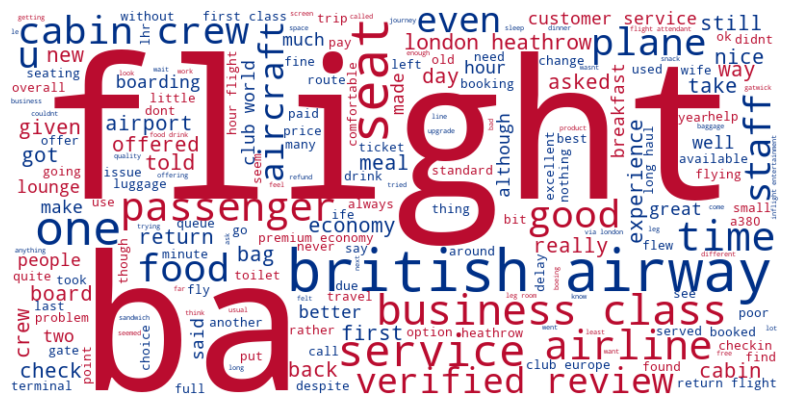

In [45]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned reviews into a single string
text = ' '.join(df2['cleaned_reviews'])

# Define British Airways colors
british_airways_colors = ['#003087', '#BA0C2F']  # Dark blue, red, white

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap=plt.cm.colors.ListedColormap(british_airways_colors)).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


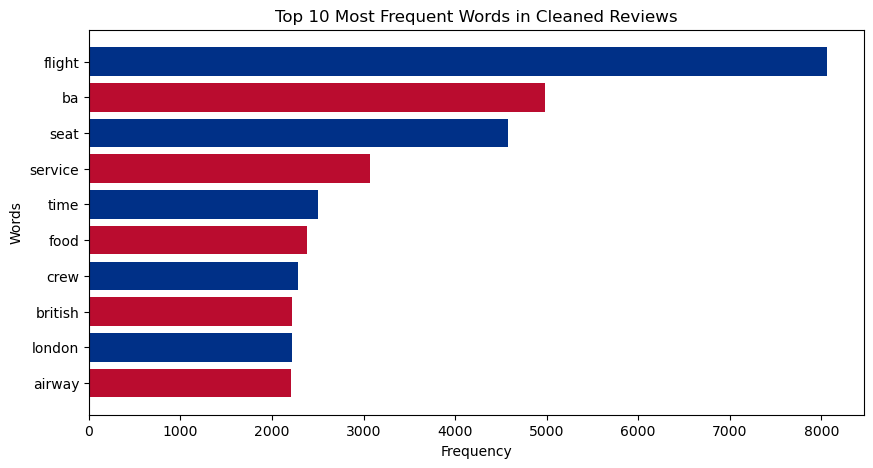

In [46]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Concatenate all cleaned reviews into a single string
text = ' '.join(df2['cleaned_reviews'])

# Count word frequencies
word_counts = Counter(text.split())

# Get the top 10 most common words and their counts
top_10_words = word_counts.most_common(10)
words, counts = zip(*top_10_words)

# Create a horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(words, counts, color=['#003087', '#BA0C2F'])  # Using British Airways colors
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words in Cleaned Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()


### SENTIMENT ANLYSIS

In [47]:
#CODE FOR SENTIMENT ANALYSIS 

import pandas as pd
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.0:
        return 'positive'
    elif polarity < 0.0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each row in the DataFrame
df2['sentiment'] = df2['reviews'].apply(classify_sentiment)

# Display the DataFrame with the new sentiment column
#print(df)


In [48]:
df2

,reviews,cleaned_reviews,sentiment
0,The worst airline I’ve ever flown. Could not c...,worst airline ive ever flown could check fligh...,negative
1,I am surprised to be able to give a favourable...,surprised able give favourable review flight e...,positive
2,Flew British Airways on BA 434 London Heathrow...,flew british airway ba 434 london heathrow ams...,positive
3,BA cancelled the flight from Tokyo to LHR. I w...,ba cancelled flight tokyo lhr booked next day ...,negative
4,I strongly advise everyone to never fly Britis...,strongly advise everyone never fly british air...,negative
...,...,...,...
3806,Flew return in CW from LHR to BKK in August 20...,flew return cw lhr bkk august 2012 positive fl...,positive
3807,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...,positive
3808,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...,positive
3809,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon a318 reall...,positive


In [49]:
df2['sentiment'].value_counts()

sentiment
positive    2659
negative    1134
neutral       18
Name: count, dtype: int64

### VISUALISATION OF SENTIMENT

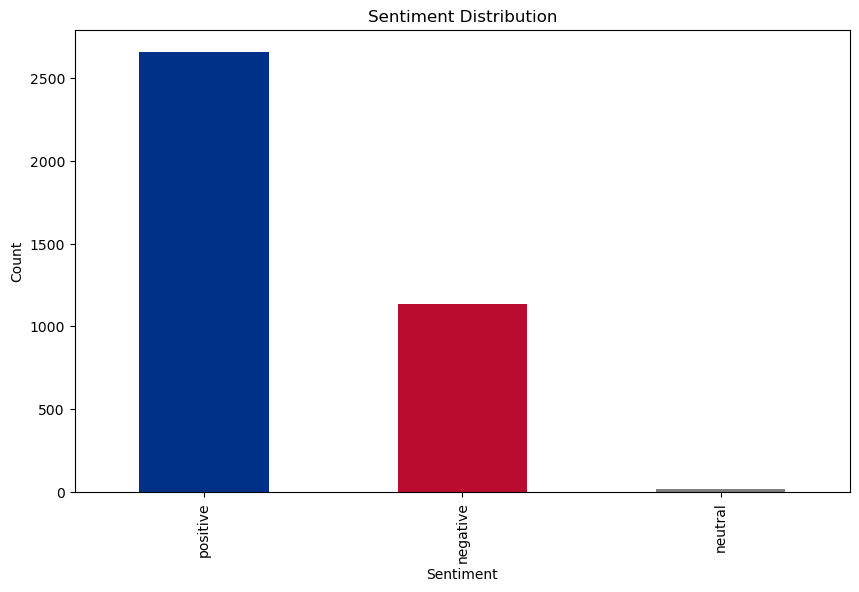

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame with a 'sentiment' column
# Plot sentiment value counts
color_map = {
    'positive': '#003087',  # Dark blue
    'negative': '#BA0C2F',  # Red
    'neutral': 'gray'  # Gray for neutral, you can change this if you have other sentiment categories
}

sentiment_counts = df2['sentiment'].value_counts()

# Apply colors to the bars based on the sentiment category
colors = [color_map.get(sentiment, 'gray') for sentiment in sentiment_counts.index]

# Plot the bar chart
sentiment_counts.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


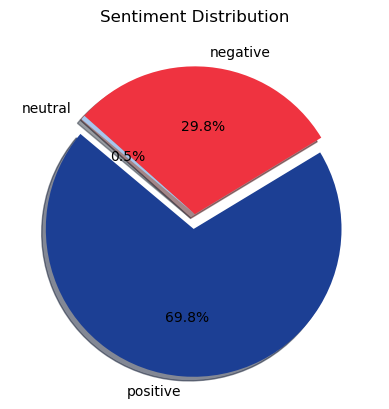

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and it has a column named 'sentiment'

# Define British Airways colors
colors = ['#1c3f94', '#ef3340', '#a7c6ed']

# Generate the pie chart
df2['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, 
                                     startangle=140, shadow=True, explode=(0.1, 0, 0))

# Set title
plt.title('Sentiment Distribution')

# Display the plot
plt.ylabel('')  # Optional: to remove the y-label
plt.show()


### TOPIC MODELLING

In [52]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



# Topic Modeling
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df2['cleaned_reviews'])
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(doc_term_matrix)

# Display the topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])




Topic 1:
['drink', 'ba', 'food', 'cabin', 'seat', 'time', 'service', 'crew', 'good', 'flight']
Topic 2:
['meal', 'crew', 'service', 'cabin', 'business', 'food', 'flight', 'class', 'ba', 'seat']
Topic 3:
['london', 'economy', 'time', 'service', 'british', 'airway', 'airline', 'seat', 'ba', 'flight']
Topic 4:
['time', 'day', 'service', 'customer', 'airway', 'british', 'london', 'hour', 'ba', 'flight']


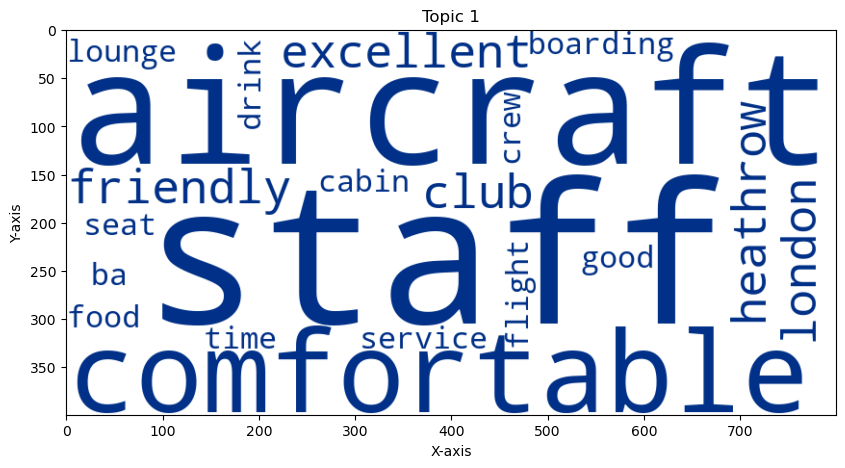

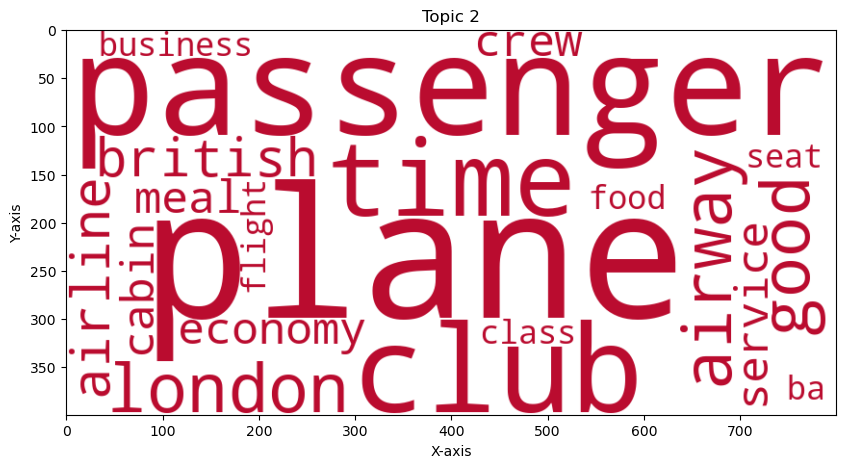

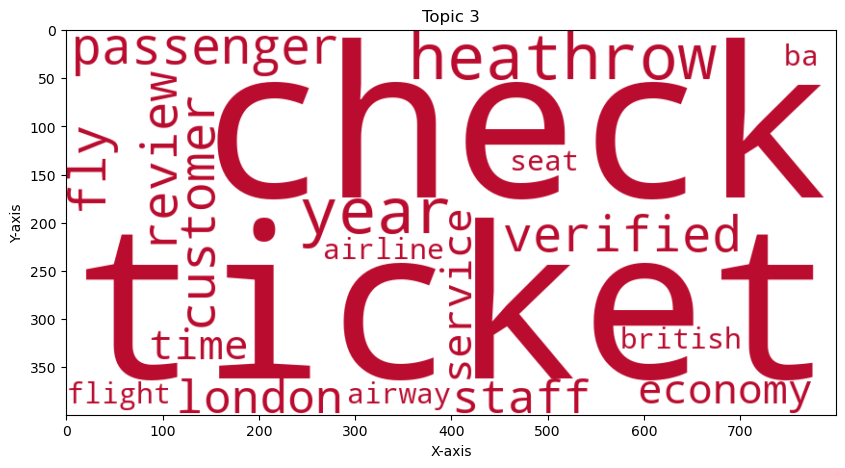

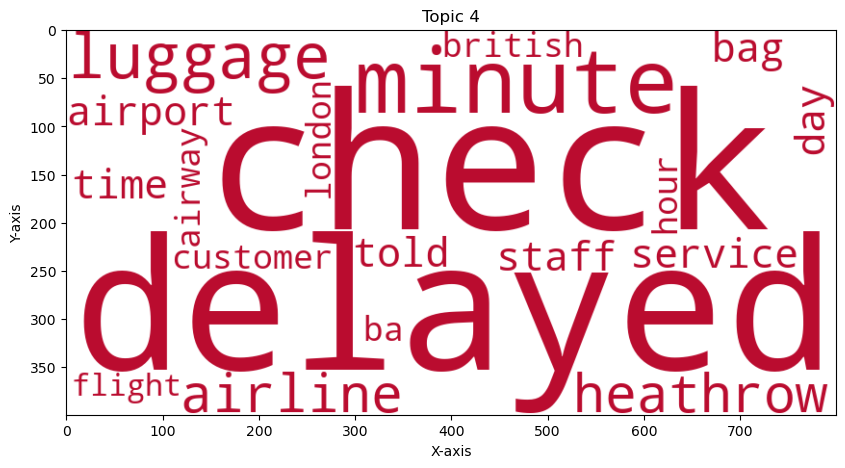

In [53]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Perform Topic Modeling
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df2['cleaned_reviews'])
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(doc_term_matrix)

# Define BA colors
ba_blue = '#003087'
ba_red = '#BA0C2F'

# Extract the topics and create word clouds
for idx, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]]
    # Create a word cloud with specified color
    color = ba_blue if idx == 0 else ba_red
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: color).generate(' '.join(topic_words))
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx + 1}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(False)  # Disable grid lines
    plt.show()


### MOST COMMON PHRASES

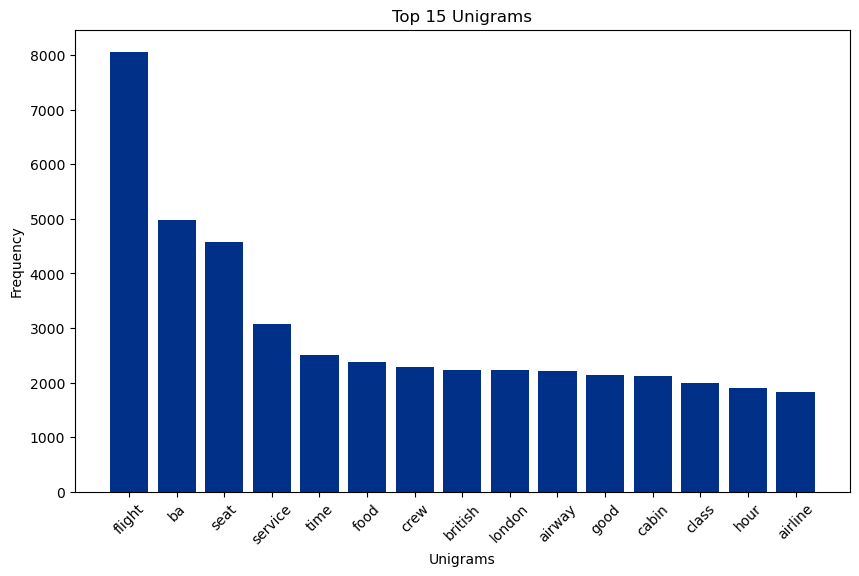

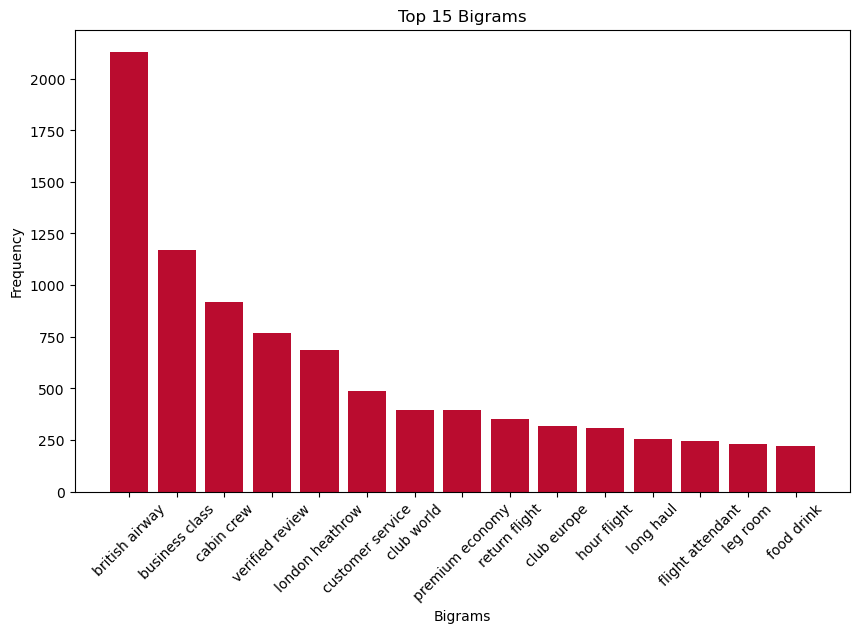

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Sample DataFrame containing reviews

# Define the function to extract n-grams
def extract_ngrams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngram_counts = ngrams.sum(axis=0).tolist()[0]
    ngram_features = vectorizer.get_feature_names_out()
    ngram_freq = pd.DataFrame(ngram_counts, index=ngram_features, columns=['count'])
    return ngram_freq

# Extract and visualize unigrams (1-grams)
unigram_freq = extract_ngrams(df2['cleaned_reviews'], 1)
unigram_freq = unigram_freq.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(unigram_freq.index, unigram_freq['count'], color='#003087')
plt.title('Top 15 Unigrams')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Extract and visualize bigrams (2-grams)
bigram_freq = extract_ngrams(df2['cleaned_reviews'], 2)
bigram_freq = bigram_freq.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(bigram_freq.index, bigram_freq['count'], color='#BA0C2F')
plt.title('Top 15 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### FOCUS ON CUSTOMER SERVICE 

#### FROM THE COMMON BIGRAMS SHOWN PREVIOUSLY

##### THE CODE AND VISUALISATION DISPLAYS THE SENTIMENT AROUND CUSTOMER SERVICE AND KEYWORDS AROUND CUSTOMER SERVICE

Positive mentions: 205
Negative mentions: 164
Neutral mentions: 3


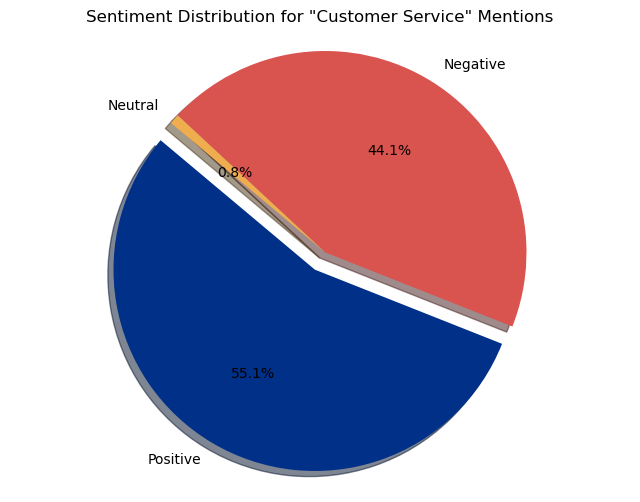

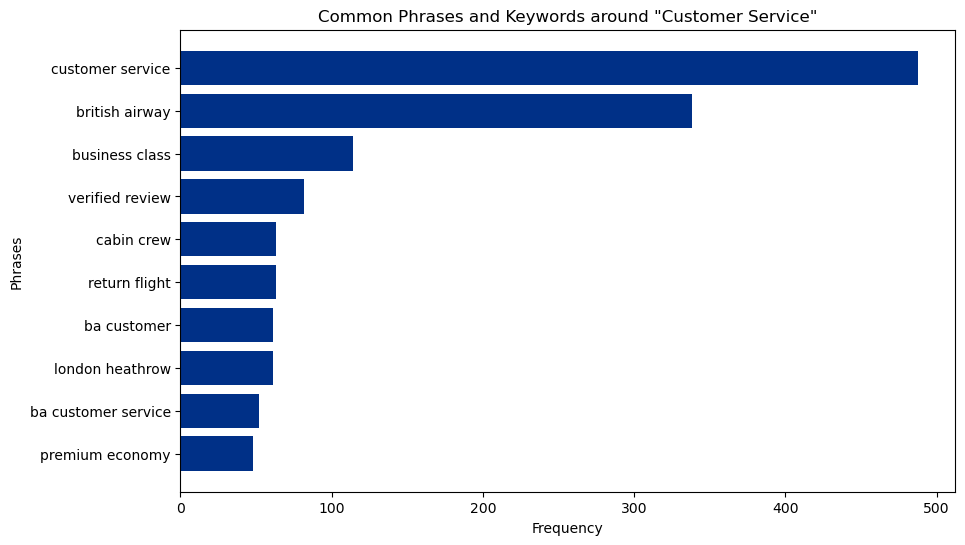

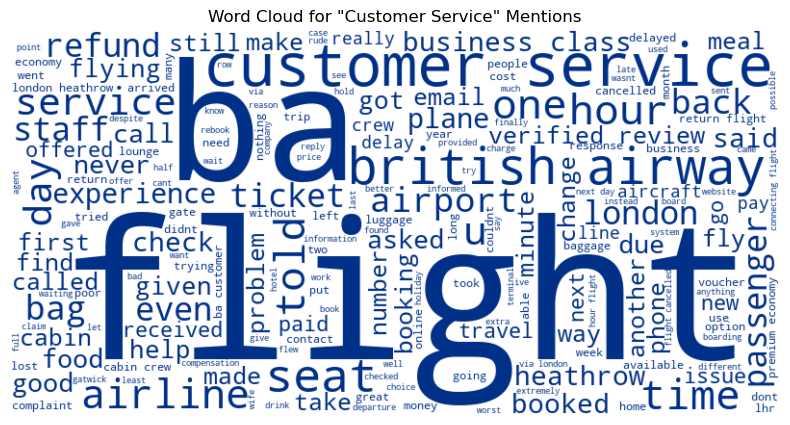

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df2 is the DataFrame containing the reviews and sentiment data

# Filter reviews mentioning "customer service"
customer_service_reviews = df2[df2['cleaned_reviews'].str.contains('customer service', case=False, na=False)]

# Perform sentiment analysis (here, just count positive/negative mentions as a placeholder)
positive_mentions = customer_service_reviews[customer_service_reviews['sentiment'] == 'positive'].shape[0]
negative_mentions = customer_service_reviews[customer_service_reviews['sentiment'] == 'negative'].shape[0]
neutral_mentions = customer_service_reviews[customer_service_reviews['sentiment'] == 'neutral'].shape[0]

print(f"Positive mentions: {positive_mentions}")
print(f"Negative mentions: {negative_mentions}")
print(f"Neutral mentions: {neutral_mentions}")

# Visualize the sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_mentions, negative_mentions, neutral_mentions]
colors = ['#003087', '#d9534f', '#f0ad4e']
explode = (0.1, 0, 0)  # explode the first slice (i.e., 'Positive')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Sentiment Distribution for "Customer Service" Mentions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Extract context around "customer service" (bigrams and trigrams)
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngrams = vectorizer.fit_transform(customer_service_reviews['cleaned_reviews'])
ngram_counts = ngrams.sum(axis=0).tolist()[0]
ngram_features = vectorizer.get_feature_names_out()
ngram_freq = pd.DataFrame(ngram_counts, index=ngram_features, columns=['count'])
ngram_freq = ngram_freq.sort_values(by='count', ascending=False).head(10)

# Visualize the common phrases and keywords around "customer service"
plt.figure(figsize=(10, 6))
plt.barh(ngram_freq.index, ngram_freq['count'], color='#003087')
plt.title('Common Phrases and Keywords around "Customer Service"')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Generate a word cloud for visualizing common words
text = ' '.join(customer_service_reviews['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: '#003087').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for "Customer Service" Mentions')
plt.axis('off')
plt.show()


##### THE CODE AND VISUALISATION DISPLAYS THE ONLY THE KEYWORDS ASSOCIATED NEGATIVE SENTIMENT AROUND CUSTOMER SERVICE. 

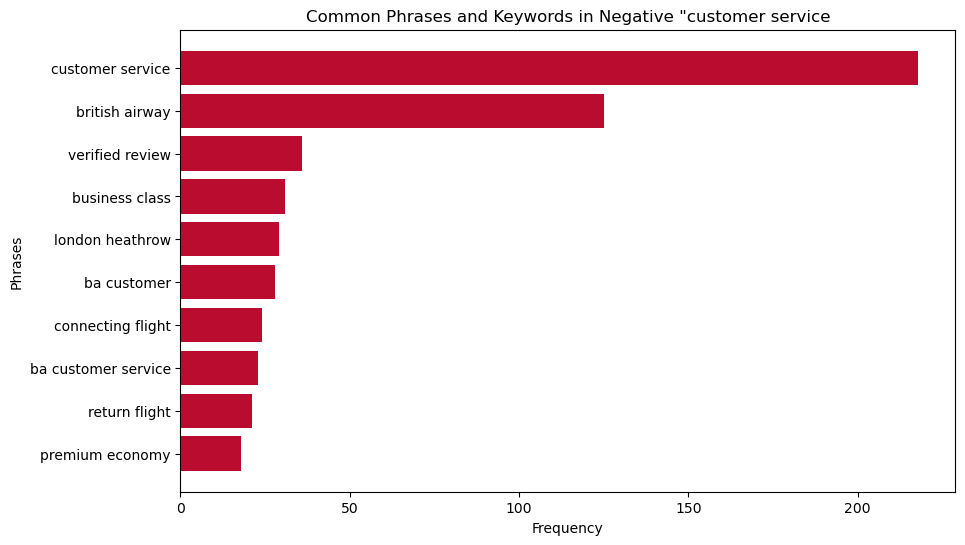

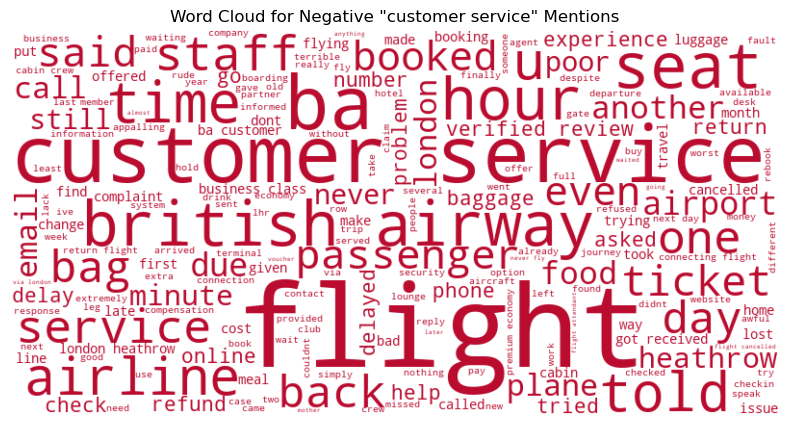

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Filter negative reviews mentioning "cabin crew"
negative_cabin_crew_reviews = df2[(df2['cleaned_reviews'].str.contains('customer service', case=False, na=False)) & (df2['sentiment'] == 'negative')]

# Context extraction: bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngrams = vectorizer.fit_transform(negative_cabin_crew_reviews['cleaned_reviews'])
ngram_counts = ngrams.sum(axis=0).tolist()[0]
ngram_features = vectorizer.get_feature_names_out()
ngram_freq = pd.DataFrame(ngram_counts, index=ngram_features, columns=['count'])
ngram_freq = ngram_freq.sort_values(by='count', ascending=False).head(10)

# Visualize the common phrases and keywords around "customer service" in negative reviews
plt.figure(figsize=(10, 6))
plt.barh(ngram_freq.index, ngram_freq['count'], color='#BA0C2F')
plt.title('Common Phrases and Keywords in Negative "customer service')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Generate a word cloud for visualizing common words in negative reviews
negative_text = ' '.join(negative_cabin_crew_reviews['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: '#BA0C2F').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative "customer service" Mentions')
plt.axis('off')
plt.show()
